In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import json

import sys

sys.path.append("../")

##################################################################
os.environ["TOKENIZERS_PARALLELISM"] = "false"
# os.environ["CUDA_VISIBLE_DEVICES"] = "0,1,2,3,4,5,6,7"
##################################################################

import logging
from src.utils import logging_utils
from src.utils import env_utils

logger = logging.getLogger(__name__)

logging.basicConfig(
    level=logging.DEBUG,
    format=logging_utils.DEFAULT_FORMAT,
    datefmt=logging_utils.DEFAULT_DATEFMT,
    stream=sys.stdout,
)

import torch
import transformers

logger.info(f"{torch.__version__=}, {torch.version.cuda=}")
logger.info(
    f"{torch.cuda.is_available()=}, {torch.cuda.device_count()=}, {torch.cuda.get_device_name()=}"
)
logger.info(f"{transformers.__version__=}")

2025-09-12 15:04:58 __main__ INFO     torch.__version__='2.7.0+cu126', torch.version.cuda='12.6'
2025-09-12 15:04:58 __main__ INFO     torch.cuda.is_available()=True, torch.cuda.device_count()=8, torch.cuda.get_device_name()='NVIDIA A100 80GB PCIe'
2025-09-12 15:04:58 __main__ INFO     transformers.__version__='4.55.3'


In [3]:
from src.utils.training_utils import get_device_map

# model_key = "meta-llama/Llama-3.2-3B"
# model_key = "meta-llama/Llama-3.1-8B"
# model_key = "meta-llama/Llama-3.1-70B-Instruct"
model_key = "meta-llama/Llama-3.3-70B-Instruct"
# model_key = "meta-llama/Llama-3.1-405B-Instruct"

# model_key = "google/gemma-2-9b-it"
# model_key = "google/gemma-3-12b-it"
# model_key = "google/gemma-2-27b-it"

# model_key = "deepseek-ai/DeepSeek-R1-Distill-Llama-8B"

# model_key = "allenai/OLMo-2-1124-7B-Instruct"
# model_key = "allenai/OLMo-7B-0424-hf"

# model_key = "Qwen/Qwen2-7B"
# model_key = "Qwen/Qwen2.5-14B-Instruct"
# model_key = "Qwen/Qwen2.5-32B-Instruct"
# model_key = "Qwen/Qwen2.5-72B-Instruct"

# model_key = "Qwen/Qwen3-1.7B"
# model_key = "Qwen/Qwen3-4B"
# model_key = "Qwen/Qwen3-8B"
# model_key = "Qwen/Qwen3-14B"
# model_key = "Qwen/Qwen3-32B"

# device_map = get_device_map(model_key, 30, n_gpus=8)
# device_map

2025-09-12 15:05:01 git.cmd DEBUG    Popen(['git', 'version'], cwd=/disk/u/arnab/Codes/Projects/retrieval/notebooks, stdin=None, shell=False, universal_newlines=False)
2025-09-12 15:05:01 git.cmd DEBUG    Popen(['git', 'version'], cwd=/disk/u/arnab/Codes/Projects/retrieval/notebooks, stdin=None, shell=False, universal_newlines=False)
2025-09-12 15:05:02 wandb.docker.auth DEBUG    Trying paths: ['/disk/u/arnab/.docker/config.json', '/disk/u/arnab/.dockercfg']
2025-09-12 15:05:02 wandb.docker.auth DEBUG    No config file found


In [4]:
from src.models import ModelandTokenizer

# from transformers import BitsAndBytesConfig

mt = ModelandTokenizer(
    model_key=model_key,
    torch_dtype=torch.bfloat16,
    # device_map=device_map,
    device_map="auto",
    # quantization_config = BitsAndBytesConfig(
    #     # load_in_4bit=True
    #     load_in_8bit=True
    # )
    attn_implementation="eager",
)

2025-09-12 15:05:03 src.models WARNING  meta-llama/Llama-3.3-70B-Instruct not found in /disk/u/arnab/Codes/Models
If not found in cache, model will be downloaded from HuggingFace to cache directory


2025-09-12 15:05:03 urllib3.connectionpool DEBUG    Starting new HTTPS connection (1): huggingface.co:443
2025-09-12 15:05:03 urllib3.connectionpool DEBUG    https://huggingface.co:443 "HEAD /meta-llama/Llama-3.3-70B-Instruct/resolve/main/config.json HTTP/1.1" 200 0
2025-09-12 15:05:03 urllib3.connectionpool DEBUG    https://huggingface.co:443 "HEAD /meta-llama/Llama-3.3-70B-Instruct/resolve/main/tokenizer_config.json HTTP/1.1" 200 0
2025-09-12 15:05:03 urllib3.connectionpool DEBUG    https://huggingface.co:443 "GET /api/models/meta-llama/Llama-3.3-70B-Instruct/tree/main/additional_chat_templates?recursive=False&expand=False HTTP/1.1" 404 64


Loading checkpoint shards:   0%|          | 0/30 [00:00<?, ?it/s]

2025-09-12 15:05:51 urllib3.connectionpool DEBUG    https://huggingface.co:443 "HEAD /meta-llama/Llama-3.3-70B-Instruct/resolve/main/generation_config.json HTTP/1.1" 200 0
2025-09-12 15:05:52 urllib3.connectionpool DEBUG    https://huggingface.co:443 "HEAD /meta-llama/Llama-3.3-70B-Instruct/resolve/main/custom_generate/generate.py HTTP/1.1" 404 0
2025-09-12 15:05:52 src.models INFO     loaded model <meta-llama/Llama-3.3-70B-Instruct> | size: 134570.516 MB | dtype: torch.bfloat16 | device: cuda:0


In [6]:
from src.selection.data import SelectOneTask, SelectOrderTask

#################################################################################
# TASK_CLS = SelectOrderTask
# prompt_template_idx = 1
TASK_CLS = SelectOneTask
prompt_template_idx = 2
N_DISTRACTORS = 5
OPTION_STYLE = "single_line"
#################################################################################

select_task = TASK_CLS.load(
    path=os.path.join(
        env_utils.DEFAULT_DATA_DIR, 
        "selection", 
        # "profession.json"
        # "nationality.json"
        "objects.json"
    )
)

print(select_task)

SelectOneTask: (different objects)
Categories: fruit(15), vehicle(15), furniture(15), animal(15), music instrument(15), clothing(15), electronics(15), sport equipment(15), kitchen appliance(15), vegetable(14), building(15), office supply(15), bathroom item(15), flower(15), tree(15), jewelry(15)



In [10]:
sample = select_task.get_random_sample(
    mt = mt,
    option_style=OPTION_STYLE,
    prompt_template_idx=prompt_template_idx,
    obj_idx=2,
    # category="actor",
    # category="Brazil"
    category="fruit",
    filter_by_lm_prediction=False,
)

print(sample)
print(sample.prompt())

from src.selection.utils import verify_correct_option
# sample.prompt_template = select_prof.prompt_templates[3]
print(f'"{sample.prompt()}"', ">>", sample.obj)

verify_correct_option(
    mt=mt,
    target=sample.obj,
    options=sample.options,
    input=sample.prompt()
)

Strawberry -> Orange (2): ['Keyboard', 'Submarine', 'Orange', 'Xylophone', 'Marigold', 'Yoga mat']
Which object from the following list is a fruit?
Options: Keyboard, Submarine, Orange, Xylophone, Marigold, Yoga mat.
Answer:
"Which object from the following list is a fruit?
Options: Keyboard, Submarine, Orange, Xylophone, Marigold, Yoga mat.
Answer:" >> Orange


(True,
 [PredictedToken(token=' Orange', prob=0.8359375, logit=22.375, token_id=22725, metadata=None),
  PredictedToken(token=' The', prob=0.087890625, logit=20.125, token_id=578, metadata=None),
  PredictedToken(token=' An', prob=0.053466796875, logit=19.625, token_id=1556, metadata=None),
  PredictedToken(token=' orange', prob=0.0020751953125, logit=16.375, token_id=19087, metadata=None),
  PredictedToken(token=' Only', prob=0.0020751953125, logit=16.375, token_id=8442, metadata=None)],
 OrderedDict([(22725,
               (1,
                PredictedToken(token=' Orange', prob=0.8359375, logit=22.375, token_id=22725, metadata=None))),
              (3804,
               (34,
                PredictedToken(token=' Sub', prob=0.00010967254638671875, logit=13.4375, token_id=3804, metadata=None))),
              (2947,
               (42,
                PredictedToken(token=' Mar', prob=7.534027099609375e-05, logit=13.0625, token_id=2947, metadata=None))),
              (1630,
       

In [13]:
from src.tokens import prepare_input, TokenizerOutput, find_token_range
from src.selection.functional import verify_head_patterns

sample_tokenized = prepare_input(
    prompts=sample.prompt(),
    tokenizer=mt.tokenizer,
)
def locate_with_delim(prompt, option):
    st = prompt.index(option)
    return prompt[st : st + len(option) + 1]

attn_pattern = verify_head_patterns(  # noqa
    prompt=sample.prompt(),
    tokenized_prompt=sample_tokenized,
    options=(
        [
            locate_with_delim(sample.prompt(), opt)
            for opt in sample.options
        ]
    ),
    # options=sample.options,
    pivot=sample.subj,
    mt=mt,
    heads=[(35, 19)],
    # heads=[(35, 19)],
    # generate_full_answer=True,
    query_index=-1,
    ablate_possible_ans_info_from_options=True,
    bare_prompt_template="Option: {}",
)

2025-09-12 15:07:28 src.selection.functional DEBUG    Keyboard, | opt_range=(13, 15) | bare_opt_range=(3, 5)
2025-09-12 15:07:28 src.selection.functional DEBUG    opt=" Keyboard," | bare_opt=" Keyboard,"
2025-09-12 15:07:28 src.selection.functional DEBUG    After adjusted bare_opt_range=(13, 15): bare_opt=" Keyboard,"
2025-09-12 15:07:28 src.selection.functional DEBUG    Submarine, | opt_range=(15, 18) | bare_opt_range=(3, 6)
2025-09-12 15:07:28 src.selection.functional DEBUG    opt=" Submarine," | bare_opt=" Submarine,"
2025-09-12 15:07:28 src.selection.functional DEBUG    After adjusted bare_opt_range=(15, 18): bare_opt=" Submarine,"
2025-09-12 15:07:28 src.selection.functional DEBUG    Orange, | opt_range=(18, 20) | bare_opt_range=(3, 5)
2025-09-12 15:07:28 src.selection.functional DEBUG    opt=" Orange," | bare_opt=" Orange,"
2025-09-12 15:07:28 src.selection.functional DEBUG    After adjusted bare_opt_range=(18, 20): bare_opt=" Orange,"
2025-09-12 15:07:29 src.selection.functional

In [14]:
from src.selection.functional import get_patches_to_verify_independent_enrichment
from src.functional import patch_with_baukit, interpret_logits
from src.selection.utils import get_first_token_id

patches = get_patches_to_verify_independent_enrichment(
    prompt = sample.prompt(),
    options=(
        [
            locate_with_delim(sample.prompt(), opt)
            for opt in sample.options
        ]
    ),
    pivot=sample.subj,
    mt=mt,
    tokenized_prompt=sample_tokenized,
)

patched_out = patch_with_baukit(
    mt=mt,
    inputs=sample_tokenized,
    patches=patches,
)
logits = patched_out.logits[:, -1, :]
interpret_logits(
    logits=logits,
    tokenizer=mt.tokenizer,
    interested_tokens=[get_first_token_id(opt, mt.tokenizer) for opt in sample.options],
)

2025-09-12 15:07:38 src.selection.functional DEBUG    Keyboard, | opt_range=(13, 15) | bare_opt_range=(3, 5)
2025-09-12 15:07:38 src.selection.functional DEBUG    opt=" Keyboard," | bare_opt=" Keyboard,"
2025-09-12 15:07:38 src.selection.functional DEBUG    After adjusted bare_opt_range=(13, 15): bare_opt=" Keyboard,"
2025-09-12 15:07:38 src.selection.functional DEBUG    Submarine, | opt_range=(15, 18) | bare_opt_range=(3, 6)
2025-09-12 15:07:38 src.selection.functional DEBUG    opt=" Submarine," | bare_opt=" Submarine,"
2025-09-12 15:07:38 src.selection.functional DEBUG    After adjusted bare_opt_range=(15, 18): bare_opt=" Submarine,"
2025-09-12 15:07:38 src.selection.functional DEBUG    Orange, | opt_range=(18, 20) | bare_opt_range=(3, 5)
2025-09-12 15:07:38 src.selection.functional DEBUG    opt=" Orange," | bare_opt=" Orange,"
2025-09-12 15:07:38 src.selection.functional DEBUG    After adjusted bare_opt_range=(18, 20): bare_opt=" Orange,"
2025-09-12 15:07:38 src.selection.functional

([PredictedToken(token=' Mar', prob=0.265625, logit=14.9375, token_id=2947, metadata=None),
  PredictedToken(token=' The', prob=0.0712890625, logit=13.625, token_id=578, metadata=None),
  PredictedToken(token=' X', prob=0.06298828125, logit=13.5, token_id=1630, metadata=None),
  PredictedToken(token=' A', prob=0.05908203125, logit=13.4375, token_id=362, metadata=None),
  PredictedToken(token=' Orange', prob=0.046142578125, logit=13.1875, token_id=22725, metadata=None)],
 OrderedDict([(2947,
               (1,
                PredictedToken(token=' Mar', prob=0.265625, logit=14.9375, token_id=2947, metadata=None))),
              (1630,
               (3,
                PredictedToken(token=' X', prob=0.06298828125, logit=13.5, token_id=1630, metadata=None))),
              (22725,
               (5,
                PredictedToken(token=' Orange', prob=0.046142578125, logit=13.1875, token_id=22725, metadata=None))),
              (38673,
               (11,
                PredictedTok

2025-09-12 15:08:06 matplotlib DEBUG    matplotlib data path: /disk/u/arnab/miniconda3/envs/connection/lib/python3.11/site-packages/matplotlib/mpl-data
2025-09-12 15:08:06 matplotlib DEBUG    CONFIGDIR=/disk/u/arnab/.config/matplotlib
2025-09-12 15:08:06 matplotlib DEBUG    interactive is False
2025-09-12 15:08:06 matplotlib DEBUG    platform is linux
2025-09-12 15:08:06 matplotlib DEBUG    CACHEDIR=/disk/u/arnab/.cache/matplotlib
2025-09-12 15:08:06 matplotlib.font_manager DEBUG    Using fontManager instance from /disk/u/arnab/.cache/matplotlib/fontlist-v390.json
2025-09-12 15:08:07 matplotlib.pyplot DEBUG    Loaded backend module://matplotlib_inline.backend_inline version unknown.
2025-09-12 15:08:07 matplotlib.pyplot DEBUG    Loaded backend module://matplotlib_inline.backend_inline version unknown.
2025-09-12 15:08:07 matplotlib.font_manager DEBUG    findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
2025-09-12 15:08:07 matplotlib.font

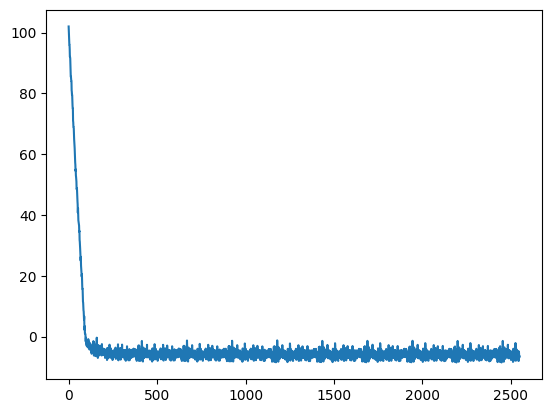

In [15]:
from matplotlib import pyplot as plt
import numpy as np

# optimized_path = os.path.join(
#     env_utils.DEFAULT_RESULTS_DIR,
#     "selection/optimized_heads",
#     mt.name.split("/")[-1],
#     f"{select_task.task_name}.npz"
# )

optimized_path = os.path.join(
    env_utils.DEFAULT_RESULTS_DIR,
    "selection/optimized_heads",
    model_key.split("/")[-1],
    # "distinct_options",
    f"{select_task.task_name}",
    "epoch_10.npz"
)

optimization_results = np.load(optimized_path, allow_pickle=True)
plt.plot(optimization_results["losses"])
plt.show()

80


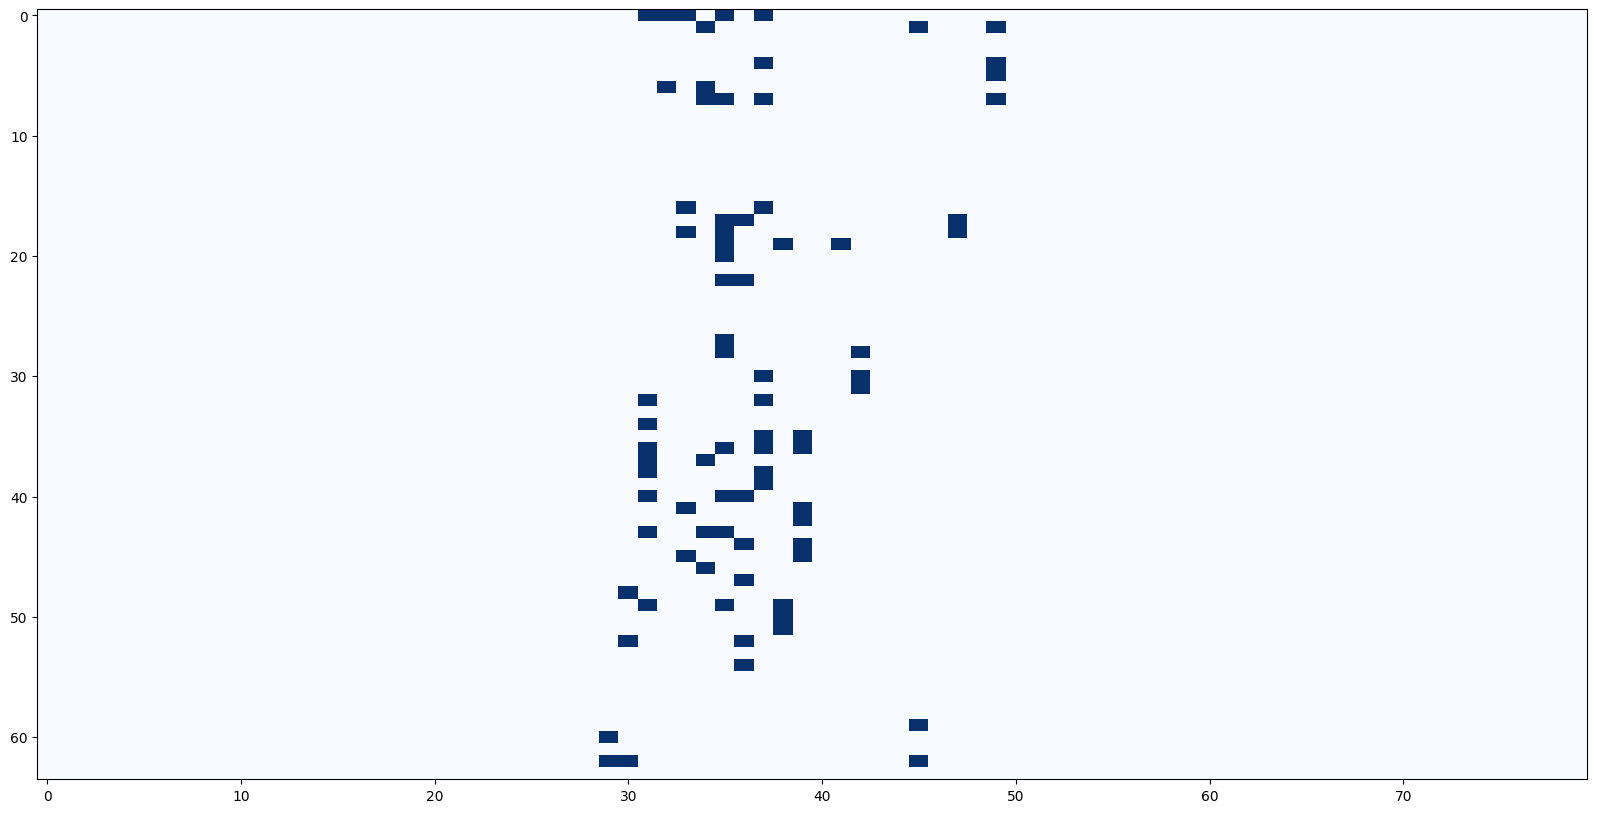

In [16]:
plt.figure(figsize=(20, 10))

optimal_head_mask = torch.tensor(optimization_results["optimal_mask"]).to(torch.float32)
optimal_head_mask[50:, :] = 0.0

plt.imshow(
    optimal_head_mask.T.numpy(),
    cmap="Blues",
    aspect="auto",
    vmin=0,
    vmax=1,
)

heads_selected = torch.nonzero(optimal_head_mask > 0.5, as_tuple=False).tolist()
heads_selected = [
    (layer_idx, head_idx) for layer_idx, head_idx in heads_selected
]
print(len(heads_selected))

# HEADS = heads_selected

# (35, 19) in HEADS, (35, 19) in heads_selected

In [34]:
from src.selection.data import CounterFactualSamplePair
from src.functional import free_gpu_cache
from src.selection.data import get_counterfactual_samples_interface
import random

validation_samples_save_path = os.path.join(
    env_utils.DEFAULT_RESULTS_DIR,
    "selection",
    "samples",
    "validation",
    mt.name.split("/")[-1],
    select_task.task_name,
    "objects",
    "ques_before"
)

os.makedirs(validation_samples_save_path, exist_ok=True)


free_gpu_cache()
validation_set = []
validation_limit = 1024

counterfactual_sampler = get_counterfactual_samples_interface[select_task.task_name]

while len(validation_set) < validation_limit:
    print(f"sample {len(validation_set)+1} / {validation_limit}")
    patch, clean = counterfactual_sampler(
        mt=mt,
        task=select_task,
        filter_by_lm_prediction=True,
        prompt_template_idx=2,
        option_style=OPTION_STYLE,
        n_distractors=random.choice(range(2, 6)),
    )
    validation_set.append((clean, patch))
    cf_pair = CounterFactualSamplePair(
        patch_sample=patch,
        clean_sample=clean,
    )
    cf_pair.detensorize()
    with open(
        os.path.join(validation_samples_save_path, f"{len(validation_set):05d}.json"),
        "w",
    ) as f:
        json.dump(cf_pair.to_dict(), f, indent=2)

len(validation_set)

sample 1 / 1024
2025-09-12 15:36:51 src.selection.data INFO     clean_obj_idx=1 | ['Lotion', 'Dog', 'Brooch', 'Dumbbell', 'Oak']
type(task)=<class 'src.selection.data.SelectOneTask'>
2025-09-12 15:36:51 src.selection.data INFO     Which object from the following list is a tree?
Options: Library, Folder, Hickory, Elephant, Train.
Answer:
2025-09-12 15:36:51 src.selection.data INFO     Palm | tree -> Hickory | pred=['" Hick"[79028] (p=0.762, logit=21.125)', '" The"[578] (p=0.132, logit=19.375)', '" A"[362] (p=0.071, logit=18.750)', '" Tree"[9119] (p=0.004, logit=15.812)', '" ""[330] (p=0.002, logit=15.312)']
2025-09-12 15:36:51 src.selection.data INFO     Which object from the following list is a animal?
Options: Lotion, Dog, Brooch, Dumbbell, Oak.
Answer:
2025-09-12 15:36:51 src.selection.data INFO     Giraffe | animal -> Dog | pred=['" Dog"[14588] (p=0.582, logit=21.250)', '" The"[578] (p=0.243, logit=20.375)', '" A"[362] (p=0.115, logit=19.625)', '" An"[1556] (p=0.005, logit=16.500)',

1024

In [36]:
from src.selection.data import CounterFactualSamplePair
import random

validation_set = []
validation_limit = 1024

validation_samples_load_path = os.path.join(
    env_utils.DEFAULT_RESULTS_DIR,
    "selection",
    "samples",
    "validation",
    mt.name.split("/")[-1],
    select_task.task_name,
    "objects",
    "ques_before"
)

sample_files = [
    os.path.join(validation_samples_load_path, f)
    for f in os.listdir(validation_samples_load_path)
    if f.endswith(".json")
]
logger.info(f"Found {len(sample_files)} sample files")

random.shuffle(sample_files)
sample_files = sample_files[:validation_limit]
for sample_file in sample_files:
    with open(sample_file, "r") as f:
        cf_pair_data = json.load(f)
    cf_pair = CounterFactualSamplePair.from_dict(cf_pair_data)
    validation_set.append((cf_pair.clean_sample, cf_pair.patch_sample))

len(validation_set)

2025-09-12 17:19:44 __main__ INFO     Found 1024 sample files


1024

In [37]:
sample, patch_sample = validation_set[0]
print(sample.prompt(), ">>", mt.tokenizer.decode(sample.ans_token_id))
print(patch_sample.prompt(), ">>", mt.tokenizer.decode(patch_sample.ans_token_id))

Which object from the following list is a tree?
Options: Helmet, Pepper, Pine.
Answer: >>  Pine
Which object from the following list is a vegetable?
Options: Zucchini, Watermelon, Oak.
Answer: >>  Z


In [38]:
from tqdm.auto import tqdm

ind_enrich_results = []
for i, (sample, patch_sample) in tqdm(enumerate(validation_set)):
    logger.info(f"Processing test sample: {i+1}/{len(validation_set)}")
    print(sample)
    print(sample.prompt())
    sample_tokenized = prepare_input(
        prompts=sample.prompt(),
        tokenizer=mt.tokenizer,
    )
    interested_tokens = [
        get_first_token_id(opt, mt.tokenizer) for opt in sample.options
    ]
    # clean run
    clean_output = patch_with_baukit(
        mt=mt,
        inputs=sample_tokenized,
        patches=[],
    )
    clean_logits = clean_output.logits[:, -1, :]
    clean_pred, clean_track = interpret_logits(
        logits=clean_logits,
        tokenizer=mt.tokenizer,
        interested_tokens=interested_tokens,
    )
    logger.info(f"clean pred={[str(pred) for pred in clean_pred]}")
    logger.info(f"clean track={clean_track}")
    logger.info("-"*75)

    # get the patches
    patches = get_patches_to_verify_independent_enrichment(
        prompt = sample.prompt(),
        options=(
            [
                locate_with_delim(sample.prompt(), opt)
                for opt in sample.options
            ]
        ),
        # options=sample.options,
        # options=[locate_with_delim(sample.prompt(), sample.obj)],
        # options=[sample.obj],
        # options=sample.options,
        pivot=sample.subj,
        mt=mt,
        tokenized_prompt=sample_tokenized,
        bare_prompt_template="Option: {}"
    )

    # patched run
    patched_out = patch_with_baukit(
        mt=mt,
        inputs=sample_tokenized,
        patches=patches,
    )
    int_logits = patched_out.logits[:, -1, :]
    int_pred, int_track = interpret_logits(
        logits=int_logits,
        tokenizer=mt.tokenizer,
        interested_tokens=[get_first_token_id(opt, mt.tokenizer) for opt in sample.options],
    )
    logger.info(f"int pred={[str(pred) for pred in int_pred]}")
    logger.info(f"int track={int_track}")

    ind_enrich_results.append({
        "sample": sample,
        "interested_tokens": interested_tokens,
        "clean": {
            "pred": clean_pred,
            "track": clean_track,
        },
        "int": {
            "pred": int_pred,
            "track": int_track,
        },
    })
    logger.info("=" * 100)
    

0it [00:00, ?it/s]

2025-09-12 17:19:53 __main__ INFO     Processing test sample: 1/1024


Hickory -> Pine (2): ['Helmet', 'Pepper', 'Pine']
Which object from the following list is a tree?
Options: Helmet, Pepper, Pine.
Answer:
2025-09-12 17:19:53 __main__ INFO     clean pred=['" Pine"[42609] (p=0.699, logit=20.500)', '" The"[578] (p=0.177, logit=19.125)', '" A"[362] (p=0.065, logit=18.125)', '" Option"[7104] (p=0.005, logit=15.562)', '" ("[320] (p=0.004, logit=15.438)']
2025-09-12 17:19:53 __main__ INFO     clean track=OrderedDict([(42609, (1, PredictedToken(token=' Pine', prob=0.69921875, logit=20.5, token_id=42609, metadata=None))), (52882, (7, PredictedToken(token=' Pepper', prob=0.00323486328125, logit=15.125, token_id=52882, metadata=None))), (67629, (101, PredictedToken(token=' Helmet', prob=3.600120544433594e-05, logit=10.625, token_id=67629, metadata=None)))])
2025-09-12 17:19:53 __main__ INFO     ---------------------------------------------------------------------------
2025-09-12 17:19:53 src.selection.functional DEBUG    Helmet, | opt_range=(13, 15) | bare_opt_r

In [41]:
len(ind_enrich_results)

1024

2025-09-12 17:53:10 __main__ INFO     Independent enrichment accuracy: 55.57%


Text(0.5, 0, 'Object Index')

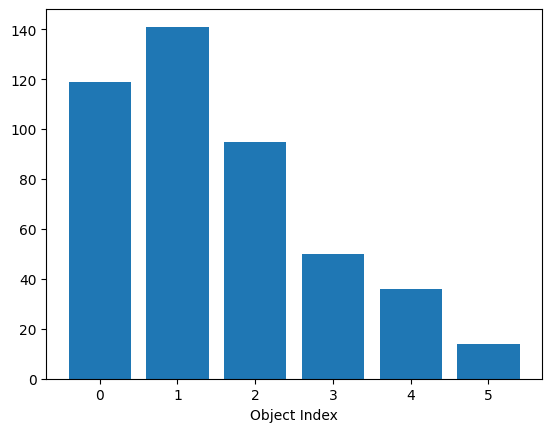

In [40]:
passed_cases = []
failed_cases = []

for result in ind_enrich_results:
    sample = result["sample"]
    int_track = result["int"]["track"]
    if int_track[list(int_track.keys())[0]][1].token_id == sample.ans_token_id:
        passed_cases.append(result)
    else:
        failed_cases.append(result)

accuracy = len(passed_cases) / len(ind_enrich_results)
logger.info(f"Independent enrichment accuracy: {accuracy*100:.2f}%")

failed_positions = {}
for result in failed_cases:
    sample = result["sample"]
    obj_idx = sample.obj_idx
    if obj_idx not in failed_positions:
        failed_positions[obj_idx] = 0
    failed_positions[obj_idx] += 1

from matplotlib import pyplot as plt
plt.bar(failed_positions.keys(), failed_positions.values())
plt.xlabel("Object Index")

In [25]:
from src.tokens import prepare_input, TokenizerOutput, find_token_range
from src.selection.functional import verify_head_patterns

sample_idx = 12
# sample = passed_cases[sample_idx]["sample"]
sample = failed_cases[sample_idx]["sample"]
sample_tokenized = prepare_input(
    prompts=sample.prompt(),
    tokenizer=mt.tokenizer,
)
def locate_with_delim(prompt, option):
    st = prompt.index(option)
    return prompt[st : st + len(option) + 1]

attn_pattern = verify_head_patterns(  # noqa
    prompt=sample.prompt(),
    tokenized_prompt=sample_tokenized,
    # options=(
    #     [
    #         locate_with_delim(sample.prompt(), opt)
    #         for opt in sample.options
    #     ]
    # ),
    # options=[locate_with_delim(sample.prompt(), sample.obj)], #! Less destructive. But I think it convays the same point
    options=[f"{sample.obj}"], #! Without delim. the LM can store some info there.
    pivot=sample.subj,
    mt=mt,
    # heads=[(35, 19)],
    heads=heads_selected,
    # generate_full_answer=True,
    query_index=-1,
    ablate_possible_ans_info_from_options=True,
    bare_prompt_template="Option: {}",
    # bare_prompt_template=" A {}", #! Not bad, a bit inconsistent. Probably `A Pear` is less common. Not a problem when the option is a person.
    # bare_prompt_template=" {}", #! Breaks attn pattern and LM performance. Maybe the LM deals with first token differently. 
)

IndexError: list index out of range

In [ ]:
passed_cases[sample_idx]["int"]["pred"], passed_cases[sample_idx]["clean"]["pred"] 

([PredictedToken(token=' None', prob=0.376953125, logit=14.875, token_id=2290, metadata=None),
  PredictedToken(token=' A', prob=0.115234375, logit=13.6875, token_id=362, metadata=None),
  PredictedToken(token=' The', prob=0.083984375, logit=13.375, token_id=578, metadata=None),
  PredictedToken(token=' An', prob=0.037353515625, logit=12.5625, token_id=1556, metadata=None),
  PredictedToken(token=' B', prob=0.03515625, logit=12.5, token_id=426, metadata=None)],
 [PredictedToken(token=' Birch', prob=0.6796875, logit=21.0, token_id=88088, metadata=None),
  PredictedToken(token=' The', prob=0.1337890625, logit=19.375, token_id=578, metadata=None),
  PredictedToken(token=' Among', prob=0.091796875, logit=19.0, token_id=22395, metadata=None),
  PredictedToken(token=' A', prob=0.0159912109375, logit=17.25, token_id=362, metadata=None),
  PredictedToken(token=' (', prob=0.01239013671875, logit=17.0, token_id=320, metadata=None)])

In [ ]:
from src.selection.functional import get_patches_to_verify_independent_enrichment
from src.functional import patch_with_baukit, patch_with_nnsight


patches = get_patches_to_verify_independent_enrichment(
    prompt = sample.prompt(),
    # options=["Options: Folder, Birch, Bat, Chain, Accordion, Air fryer.\n"],
    options=["Birch,"],
    pivot=sample.subj,
    mt=mt,
    tokenized_prompt=sample_tokenized,
)

patched_run = patch_with_baukit(
    mt=mt,
    inputs=sample_tokenized,
    patches=patches,
)

patched_logits = patched_run.logits[0, -1, :]
interpret_logits(
    logits=patched_logits,
    tokenizer=mt.tokenizer,
)

2025-09-07 11:21:15 src.selection.functional DEBUG    Birch, | opt_range=(5, 7) | bare_opt_range=(1, 3)
2025-09-07 11:21:15 src.selection.functional DEBUG    opt=" Birch," | bare_opt=" Birch,"
2025-09-07 11:21:15 src.selection.functional DEBUG    After adjusted bare_opt_range=(5, 7): bare_opt=" Birch,"


[PredictedToken(token=' Birch', prob=0.341796875, logit=18.5, token_id=88088, metadata=None),
 PredictedToken(token=' None', prob=0.2080078125, logit=18.0, token_id=2290, metadata=None),
 PredictedToken(token=' The', prob=0.142578125, logit=17.625, token_id=578, metadata=None),
 PredictedToken(token=' A', prob=0.041015625, logit=16.375, token_id=362, metadata=None),
 PredictedToken(token=' Bat', prob=0.0247802734375, logit=15.875, token_id=16488, metadata=None)]

In [ ]:
patches

[PatchSpec(location=('model.layers.0', 5), patch=tensor([-0.0063, -0.0109,  0.0114,  ...,  0.0025, -0.0112, -0.0104],
        device='cuda:0', dtype=torch.bfloat16), clean=None, strategy='replace'),
 PatchSpec(location=('model.layers.1', 5), patch=tensor([-0.0058, -0.0012,  0.0112,  ...,  0.0068, -0.0071, -0.0088],
        device='cuda:0', dtype=torch.bfloat16), clean=None, strategy='replace'),
 PatchSpec(location=('model.layers.2', 5), patch=tensor([-0.0019, -0.0031,  0.0139,  ...,  0.0046, -0.0109, -0.0017],
        device='cuda:0', dtype=torch.bfloat16), clean=None, strategy='replace'),
 PatchSpec(location=('model.layers.3', 5), patch=tensor([ 0.0037,  0.0114,  0.0168,  ..., -0.0044, -0.0085,  0.0079],
        device='cuda:0', dtype=torch.bfloat16), clean=None, strategy='replace'),
 PatchSpec(location=('model.layers.4', 5), patch=tensor([-0.0084,  0.0091,  0.0161,  ..., -0.0003, -0.0059,  0.0125],
        device='cuda:0', dtype=torch.bfloat16), clean=None, strategy='replace'),
 Patc